In [2]:
from pathlib import Path

import polars as pl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
DATA_PATH = Path('/Users/gouyashuto/localrepository/atmacup18/input')

In [4]:
train_df = pl.read_csv(DATA_PATH / 'train_features.csv')
test_df = pl.read_csv(DATA_PATH / 'test_features.csv')

print(train_df.shape)
print(test_df.shape)

(43371, 30)
(1727, 12)


In [6]:
train_scene = train_df['ID'].str.split('_').list[0].to_pandas().unique()
test_scene = test_df['ID'].str.split('_').list[0].to_pandas().unique()
len(set(train_scene) & set(test_scene))

0

<Axes: xlabel='ID'>

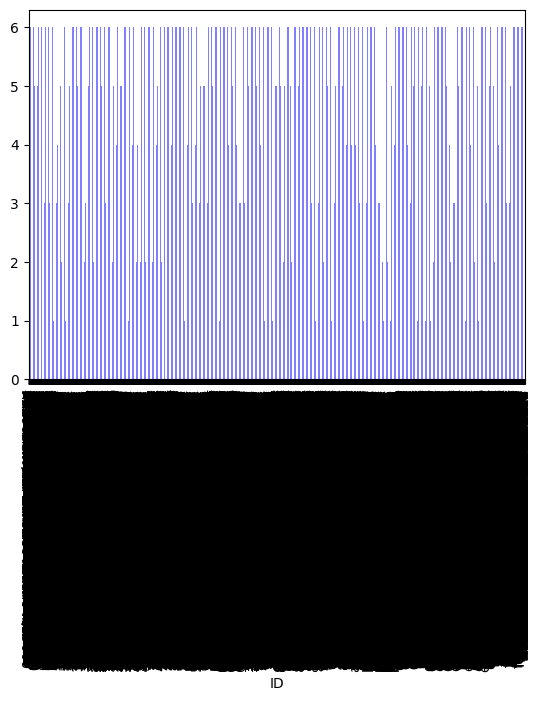

In [7]:
train_df['ID'].str.split('_').list[0].to_pandas().value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5)

In [4]:
train_df.head()

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243


In [5]:
train_df['gearShifter'].value_counts()

gearShifter,count
str,u32
"""reverse""",2
"""neutral""",3
"""park""",115
"""drive""",43251


In [49]:
train_df.filter(pl.col('gearShifter') == 'park')

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""03c2577eb4e2eeae5897fe02611143…",-0.000766,-0.006886,-31.41147,-102.0,0.0,true,0.0,false,"""park""",true,false,-0.037658,-0.004339,0.008709,-0.074929,-0.011872,0.015839,-0.105589,-0.01862,0.024131,-0.137473,-0.021959,0.03387,-0.166433,-0.030183,0.043099,-0.196217,-0.035743,0.052064
"""03c2577eb4e2eeae5897fe02611143…",-3.9342e-11,-3.5354e-10,-31.892496,-100.0,0.0,false,0.0,false,"""park""",true,false,-0.028422,-0.005286,0.011472,-0.056948,-0.010332,0.023293,-0.084774,-0.014248,0.036968,-0.112748,-0.015159,0.051672,-0.140838,-0.01672,0.067407,-0.16882,-0.019637,0.083064
"""09366a807d8fa0f520db3903fc130e…",-9.1971e-22,-8.2650e-21,35.969219,-11.0,0.0,true,0.0,false,"""park""",false,false,0.008676,0.003927,0.015767,0.01768,0.007903,0.030903,0.025904,0.011058,0.045063,0.034293,0.013989,0.058625,0.041645,0.015915,0.069079,0.049358,0.018101,0.081767
"""09366a807d8fa0f520db3903fc130e…",-4.7220e-29,-4.2434e-28,36.118126,-10.0,0.0,false,0.0,false,"""park""",false,false,0.008699,0.00083,0.010318,0.016632,0.001538,0.020362,0.026197,0.002071,0.030207,0.034846,0.002316,0.039989,0.043362,0.002021,0.049508,0.051311,0.00134,0.058741
"""09376a6fde7bef091cb6355c042daa…",0.0,0.0,-14.527878,-89.0,0.0,false,0.0,false,"""park""",false,false,0.000043,-0.000368,0.003905,0.000705,-0.000792,0.008012,0.002113,-0.0012,0.012227,0.002949,-0.0016,0.016257,0.003866,-0.00196,0.01857,-0.118637,-0.057444,0.075274
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""f6676060bb56f6423239a547345085…",0.0,0.0,-14.117746,0.0,0.0,false,0.0,false,"""park""",false,false,0.05286,0.050164,0.00145,0.115359,0.115537,0.004008,0.186111,0.183502,0.006239,0.246365,0.254501,0.008233,0.291679,0.326738,0.010026,0.329264,0.400468,0.010596
"""fbb27659b98f96bc23a47e3c321d12…",0.0,0.0,0.098628,2.0,0.0,false,0.0,false,"""park""",false,false,-0.000879,-0.009589,0.105016,-0.002034,-0.02063,0.232114,-0.002228,-0.030753,0.355219,-0.00261,-0.0402,0.474203,-0.001752,-0.049452,0.589101,-0.001297,-0.058906,0.700566
"""fbb27659b98f96bc23a47e3c321d12…",0.0,0.0,0.099047,2.0,0.0,false,0.0,false,"""park""",false,false,-0.004451,-0.017706,0.14376,-0.010019,-0.038604,0.318615,-0.014286,-0.057786,0.488182,-0.018228,-0.075469,0.652474,-0.021735,-0.092084,0.811592,-0.024816,-0.107991,0.965549


In [7]:
train_df.filter(pl.col('leftBlinker') & pl.col('rightBlinker'))

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64


In [6]:
train_df['leftBlinker'].to_pandas().plot()

TypeError: no numeric data to plot

In [8]:
train_df['ID'][0]

'00066be8e20318869c38c66be466631a_320'

In [27]:
TARGET_COLS = [
    'x_0', 'y_0', 'z_0',
    'x_1', 'y_1', 'z_1',
    'x_2', 'y_2', 'z_2',
    'x_3', 'y_3', 'z_3',
    'x_4', 'y_4', 'z_4',
    'x_5', 'y_5', 'z_5'
]

In [11]:
train_df.null_count()

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df.describe()

statistic,ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""43371""",43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,"""43371""",43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0,43371.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,9.172176,-0.015654,-2.065173,-19.009546,0.0,0.307602,0.084003,0.483595,null,0.077955,0.102718,4.122444,0.001949,0.001247,8.694386,0.004477,0.002618,13.255113,0.006758,0.003981,17.80058,0.009001,0.005223,22.330185,0.011159,0.006012,26.842607,0.013564,0.006648
"""std""",null,7.22692,0.632402,65.548822,110.799971,0.0,null,0.109837,null,null,null,null,3.266717,0.116866,0.040745,6.894355,0.327714,0.083388,10.52081,0.63765,0.127081,14.147079,1.041827,0.172892,17.772877,1.534514,0.220837,21.398114,2.111089,0.271671
"""min""","""00066be8e20318869c38c66be46663…",-0.161919,-4.936206,-481.394287,-700.0,0.0,0.0,0.0,0.0,"""drive""",0.0,0.0,-1.732154,-2.534138,-0.996548,-3.111055,-4.09071,-1.756772,-4.454273,-5.666513,-2.341347,-5.678676,-8.864628,-3.058673,-6.799718,-12.459174,-3.871224,-7.826888,-16.384152,-4.669255
"""25%""",null,2.578666,-0.236368,-3.461754,-94.0,0.0,null,0.0,null,null,null,null,1.116531,-0.026463,-0.017625,2.334773,-0.066491,-0.036768,3.548125,-0.119848,-0.057169,4.729803,-0.182733,-0.079274,5.916052,-0.256286,-0.101681,7.034703,-0.337794,-0.125354
"""50%""",null,8.51879,-1.8348e-15,-0.356471,-13.0,0.0,null,0.0,null,null,null,null,3.843337,0.001088,0.001111,8.0828,0.002699,0.002288,12.330558,0.003819,0.003061,16.567319,0.005099,0.004306,20.76318,0.00616,0.005289,24.947074,0.007994,0.005778
"""75%""",null,14.286816,0.222298,2.626907,51.0,0.0,null,0.165,null,null,null,null,6.42812,0.030664,0.019591,13.569839,0.077847,0.041457,20.699952,0.136715,0.06429,27.834049,0.206617,0.087344,34.947244,0.286427,0.111254,42.027569,0.372728,0.134984
"""max""","""fff88cca5f8a012427b96bdde66011…",27.551262,3.14007,484.691711,700.0,0.0,1.0,0.915,1.0,"""reverse""",1.0,1.0,12.392587,3.459556,1.447929,26.160461,3.220476,2.748179,39.855555,5.073225,3.920498,53.597005,8.201288,4.773078,67.242715,12.084923,5.743042,80.9889,17.151381,6.627251


In [41]:
id = '00066be8e20318869c38c66be466631a_320'
list((DATA_PATH / 'images' / f'{id}').glob('*.png'))

[PosixPath('/Users/gouyashuto/localrepository/atmacup18/input/images/00066be8e20318869c38c66be466631a_320/image_t-0.5.png'),
 PosixPath('/Users/gouyashuto/localrepository/atmacup18/input/images/00066be8e20318869c38c66be466631a_320/image_t-1.0.png'),
 PosixPath('/Users/gouyashuto/localrepository/atmacup18/input/images/00066be8e20318869c38c66be466631a_320/image_t.png')]

In [11]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OrdinalEncoder

In [10]:
import lightgbm as lgb

In [23]:
def preprocess(df):
    df = (
        df
        .with_columns(
            scene = pl.col('ID').str.split('_').list[0],
            decisecond = pl.col('ID').str.split('_').list[1].cast(pl.Int32),
        )
        .sort(['scene', 'decisecond'])
    )
    return df

In [ ]:
def train(X: pd.DataFrame, y: pd.DataFrame, target: str):
    lgb_params = {
        'objective': 'regression',
        'metric': 'mae',
        'learning_rate': 0.01,
        'verbosity': -1,
        'boosting_type': 'gbdt',
    }
    gkf = GroupKFold(n_splits=5)
    groups = X['scene']

    models = []
    oof = np.zeros(len(X))
    for fold, (train_idx, valid_idx) in enumerate(gkf.split(X, y[target], groups=groups)):
        train_X = X.iloc[train_idx].drop(columns=['scene'])
        train_y = y[target].iloc[train_idx]
        valid_X = X.iloc[valid_idx].drop(columns=['scene'])
        valid_y = y[target].iloc[valid_idx]

        train_data = lgb.Dataset(train_X, train_y)
        valid_data = lgb.Dataset(valid_X, valid_y, reference=train_data)

        model = lgb.train(
            lgb_params,
            train_data,
            valid_sets=[valid_data],
            num_boost_round=10000,
            callbacks=[lgb.early_stopping(100)],
        )
        oof[valid_idx] = model.predict(valid_X)
        models.append(model)

    return models, oof

def predict(X: pd.DataFrame, models: list):
    preds = []
    for model in models:
        pred = model.predict(X.drop(columns=['scene']))
        preds.append(pred)
    return np.mean(preds, axis=0)

def evaluate(y_true: pd.DataFrame, y_pred: pd.DataFrame):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
train_df = preprocess(train_df)

origin_test_ids = test_df[['ID']].to_pandas()
test_df = preprocess(test_df)

print(train_df.shape)
print(test_df.shape)

(43371, 32)
(1727, 14)


In [49]:
CAT_COLS = ['gearShifter', 'scene']

In [ ]:
remove_columns = ['ID']
X = train_df.drop(remove_columns + TARGET_COLS).to_pandas()
y = train_df[TARGET_COLS].to_pandas()

test_X = test_df.drop(remove_columns).to_pandas()

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[CAT_COLS] = oe.fit_transform(X[CAT_COLS])
test_X[CAT_COLS] = oe.transform(test_X[CAT_COLS])

print(X.shape)
print(test_X.shape)

In [ ]:
models_dict = {}
oof = pd.DataFrame(np.zeros_like(train_df.to_pandas().loc[:, TARGET_COLS]), columns=TARGET_COLS)

# preds = pd.DataFrame(np.zeros((len(test_df), len(TARGET_COLS))), columns=TARGET_COLS)
preds = test_df.select(['ID']).to_pandas()
preds[TARGET_COLS] = 0

for target in TARGET_COLS:
    partial_model, partial_oofs = train(X, y, target)
    models_dict[target] = partial_model
    oof.loc[:, target] = partial_oofs
    preds.loc[:, target] = predict(test_X, models_dict[target])

evaluate(y, oof)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[823]	valid_0's l1: 0.062273
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[899]	valid_0's l1: 0.0617193
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[838]	valid_0's l1: 0.0641437
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[930]	valid_0's l1: 0.0631051
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[951]	valid_0's l1: 0.0637588
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[701]	valid_0's l1: 0.0328458
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[503]	valid_0's l1: 0.0321552
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1342]	valid_0'

SchemaError: failed to determine supertype of f64 and object

In [73]:
evaluate(y, oof)

0.23560903466107674

In [ ]:
submission = pd.read_csv(DATA_PATH / 'atmaCup18__sample_submit.csv')
submission['ID'] = origin_test_ids
submission = submission.merge(preds, on='ID', how='left').drop(columns=['ID'])
submission.to_csv('submission.csv', index=False)
submission.head()

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,0.119673,-0.871603,-0.946816,0.152166,0.084789,0.906020,-0.055452,-0.401374,0.500221,-0.836649,-0.948207,0.377567,0.252814,-0.802265,-0.639988,0.083794,0.619461,-0.095338
1,-0.761678,-0.763886,0.865678,0.003251,0.030750,-0.098339,-0.981087,0.154298,-0.615439,0.426644,-0.333395,-0.206016,-0.404843,0.746964,0.894193,-0.666344,0.133584,0.712985
2,0.372213,-0.463325,0.714337,0.579788,0.749449,-0.240471,0.341168,0.786354,-0.381213,0.377090,0.907075,0.537515,-0.589823,-0.718756,0.136976,0.882745,0.352859,-0.176213
3,0.483357,-0.633816,0.237054,0.698818,0.076883,0.931322,-0.445206,0.775386,0.090471,-0.816330,-0.907823,0.259581,0.480970,0.573239,0.815458,-0.845036,0.022991,-0.378269
4,-0.956952,-0.438974,0.584522,0.529104,-0.938485,0.910140,0.357196,0.103742,0.054913,-0.806981,0.257099,-0.266992,0.330674,0.441750,0.190157,-0.463081,0.790296,0.839739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.351988,0.952567,0.871996,0.614527,0.569125,0.053558,-0.042842,0.135640,0.397078,0.571528,0.424135,0.765628,-0.166558,-0.516265,-0.887074,0.819476,-0.865313,-0.749840
1723,-0.581799,-0.554731,0.526943,0.617806,0.727310,0.433010,-0.576517,-0.577034,0.819471,0.870071,-0.692061,0.525350,0.459625,0.434469,-0.667756,-0.713744,0.447374,0.292771
1724,0.023223,0.538056,0.687909,0.589737,0.807953,-0.082348,0.702892,0.151270,0.258311,0.165100,-0.933122,-0.715529,0.972873,-0.602957,-0.524329,-0.200444,0.509397,-0.462713
1725,0.695383,0.023371,-0.732249,-0.812755,0.627081,-0.378854,-0.967507,-0.586851,0.143918,0.073320,-0.683499,0.076952,-0.418360,0.276112,0.230500,0.129725,-0.941312,0.255627
